In [1]:
# ✅ Install OpenCV (headless version for Colab)
!pip install opencv-python-headless

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

Saving 9830f48aaf9779c18f35b66caa107eea.jpg to 9830f48aaf9779c18f35b66caa107eea.jpg


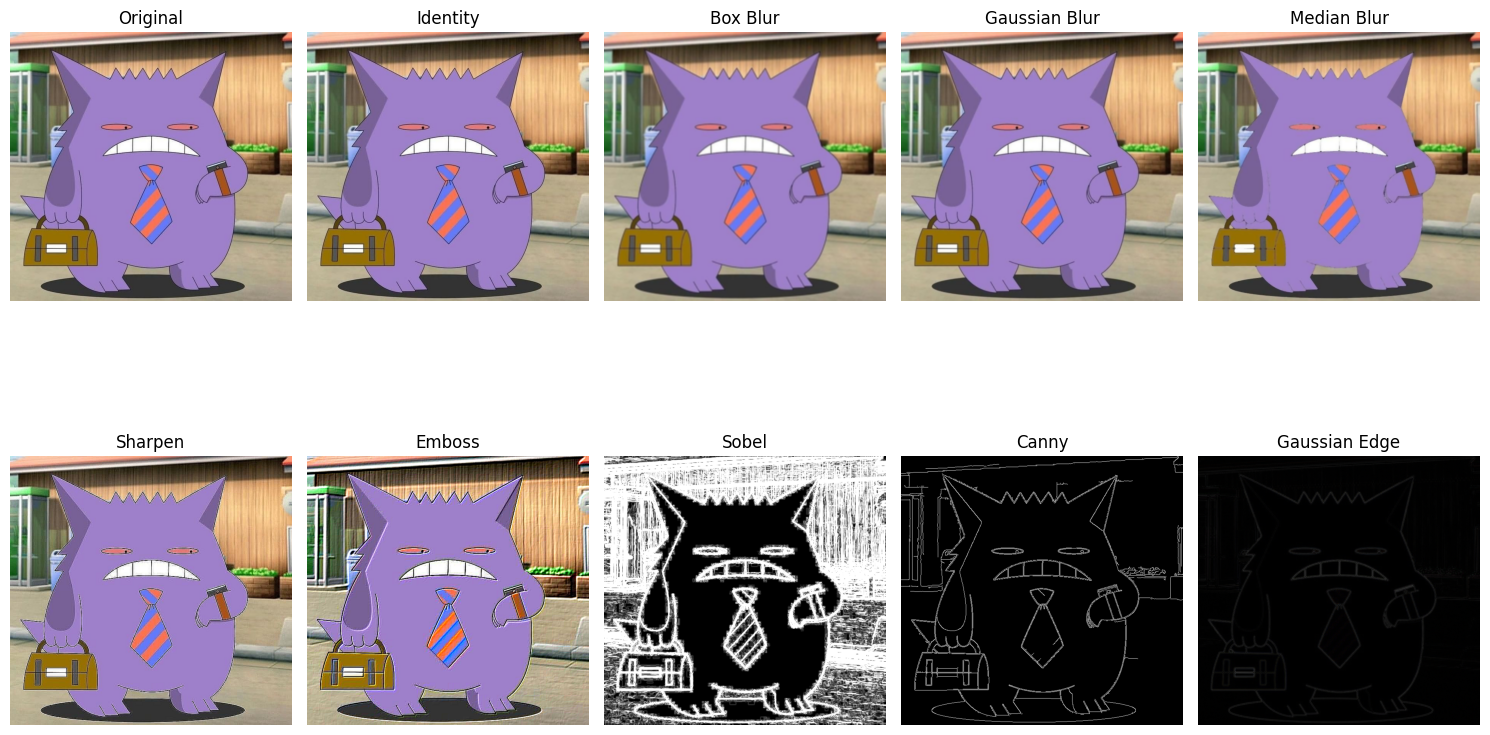

In [2]:
# ✅ Upload image
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

# ✅ Read image
img = cv2.imread(img_path)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# ------------------------------
# 1. Identity Kernel
# ------------------------------
identity_kernel = np.array([[0, 0, 0],
                            [0, 1, 0],
                            [0, 0, 0]])
identity = cv2.filter2D(img, -1, identity_kernel)

# ------------------------------
# 2. Blurring Filters
# ------------------------------
box_blur = cv2.blur(img, (5, 5))                 # Box filter
gaussian_blur = cv2.GaussianBlur(img, (5, 5), 0) # Gaussian filter
median_blur = cv2.medianBlur(img, 5)             # Median filter

# ------------------------------
# 3. Sharpen & Emboss
# ------------------------------
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
sharpen = cv2.filter2D(img, -1, sharpen_kernel)

emboss_kernel = np.array([[-2, -1, 0],
                          [-1, 1, 1],
                          [0, 1, 2]])
emboss = cv2.filter2D(img, -1, emboss_kernel)

# ------------------------------
# 4. Edge Detection
# ------------------------------
sobelx = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=5)
sobel = cv2.magnitude(sobelx, sobely)
sobel_display = cv2.convertScaleAbs(sobel)   # convert for display

canny = cv2.Canny(img_gray, 100, 200)        # already uint8

gaussian_edge = cv2.Laplacian(gaussian_blur, cv2.CV_64F)
gaussian_edge_display = cv2.convertScaleAbs(gaussian_edge)

# ------------------------------
# Show Results
# ------------------------------
titles = ['Original', 'Identity', 'Box Blur', 'Gaussian Blur', 'Median Blur',
          'Sharpen', 'Emboss', 'Sobel', 'Canny', 'Gaussian Edge']

images = [img, identity, box_blur, gaussian_blur, median_blur,
          sharpen, emboss, sobel_display, canny, gaussian_edge_display]

plt.figure(figsize=(15,10))
for i in range(len(images)):
    plt.subplot(2, 5, i+1)
    if len(images[i].shape) == 2:  # grayscale
        plt.imshow(images[i], cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()
